# Boston AirBnb Data

In [72]:
# Python Imports

import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Cleaning of Listing Data

In [73]:
# Cleaning the listings data

# Loading data from csv files
listings_dataframe = pd.read_csv('listings.csv')

# replacing NaN values with 0
listings_dataframe.fillna(0, inplace=True)

# Extracting prices from the table
price = listings_dataframe['price']
prices=[]

# converting prices into a float value
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

# replace the price column with the new column
listings_dataframe['price']=prices

# exclude the listings with 0 for price,beds,bedrooms,accomodates etc
listings_dataframe = listings_dataframe[listings_dataframe.bathrooms >0]
listings_dataframe = listings_dataframe[listings_dataframe.bedrooms > 0]
listings_dataframe = listings_dataframe[listings_dataframe.beds > 0]
listings_dataframe = listings_dataframe[listings_dataframe.price  > 0]
listings_dataframe = listings_dataframe[listings_dataframe.review_scores_rating  > 0]
listings_dataframe = listings_dataframe[listings_dataframe.reviews_per_month > 0]
listings_dataframe = listings_dataframe[listings_dataframe.accommodates  > 0]
listings_dataframe.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,3075044,https://www.airbnb.com/rooms/3075044,2.020000e+13,9/7/2016,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,0.0,0.0,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.020000e+13,9/7/2016,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,0.0,0.0,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,2.020000e+13,9/7/2016,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,0.0,0.0,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,2.020000e+13,9/7/2016,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,0.0,0.0,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,2.020000e+13,9/7/2016,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,0.0,0.0,f,flexible,f,f,1,1.70


In [74]:
listings_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 1 to 3583
Data columns (total 95 columns):
id                                  2506 non-null int64
listing_url                         2506 non-null object
scrape_id                           2506 non-null float64
last_scraped                        2506 non-null object
name                                2506 non-null object
summary                             2506 non-null object
space                               2506 non-null object
description                         2506 non-null object
experiences_offered                 2506 non-null object
neighborhood_overview               2506 non-null object
notes                               2506 non-null object
transit                             2506 non-null object
access                              2506 non-null object
interaction                         2506 non-null object
house_rules                         2506 non-null object
thumbnail_url                       25

In [75]:
## We decide on the columns to take
final_dataframe = listings_dataframe[['host_response_rate','host_acceptance_rate','host_is_superhost','host_total_listings_count','host_identity_verified','latitude','longitude','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','reviews_per_month']]
final_dataframe.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
1,100.0,100.0,f,1,t,42.286241,-71.134374,2,1.0,1.0,...,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,1.30
2,100.0,88.0,t,1,t,42.292438,-71.135765,2,1.0,1.0,...,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,0.47
3,100.0,50.0,f,1,f,42.281106,-71.121021,4,1.0,1.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.00
4,100.0,100.0,t,1,t,42.284512,-71.136258,2,1.5,1.0,...,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,2.25
5,100.0,95.0,t,2,t,42.291690,-71.131893,2,1.0,1.0,...,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,f,1.70


In [76]:
final_dataframe = final_dataframe.replace('f',0)
final_dataframe = final_dataframe.replace('t',1)
final_dataframe.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
1,100.0,100.0,0,1,1,42.286241,-71.134374,2,1.0,1.0,...,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.30
2,100.0,88.0,1,1,1,42.292438,-71.135765,2,1.0,1.0,...,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,0.47
3,100.0,50.0,0,1,0,42.281106,-71.121021,4,1.0,1.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.00
4,100.0,100.0,1,1,1,42.284512,-71.136258,2,1.5,1.0,...,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,0,2.25
5,100.0,95.0,1,2,1,42.291690,-71.131893,2,1.0,1.0,...,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0,1.70


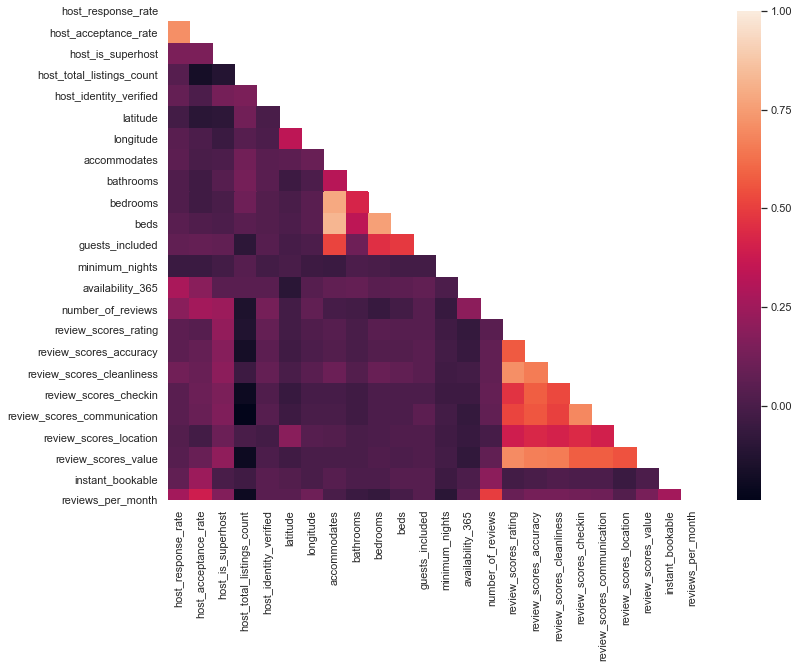

In [77]:
# plot correlations by color using seaborn's heatmap
# set figure size for better visibility 
sns.set(rc={'figure.figsize':(12,9)})
correlation_matrix = final_dataframe.corr().round(2)
# In mask, data will not be shown in cells for the upper indices of the squared matrix where mask = true.
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
# annot = False to not print the values inside the square
with sns.axes_style("white"):
    sns.heatmap(data=correlation_matrix, mask=mask, annot=False)

In [78]:
## We are going to categorically classify these columns into numerical value
for categorical_feature in ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type','host_response_time','cancellation_policy']:
    final_dataframe = pd.concat([final_dataframe, pd.get_dummies(listings_dataframe[categorical_feature])], axis=1)
final_dataframe.fillna(0)
final_dataframe.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,...,Real Bed,0,a few days or more,within a day,within a few hours,within an hour,flexible,moderate,strict,super_strict_30
1,100.0,100.0,0,1,1,42.286241,-71.134374,2,1.0,1.0,...,1,0,0,0,0,1,0,1,0,0
2,100.0,88.0,1,1,1,42.292438,-71.135765,2,1.0,1.0,...,1,0,0,0,1,0,0,1,0,0
3,100.0,50.0,0,1,0,42.281106,-71.121021,4,1.0,1.0,...,1,0,0,0,1,0,0,1,0,0
4,100.0,100.0,1,1,1,42.284512,-71.136258,2,1.5,1.0,...,1,0,0,0,0,1,1,0,0,0
5,100.0,95.0,1,2,1,42.291690,-71.131893,2,1.0,1.0,...,1,0,0,0,1,0,1,0,0,0


### Cleaning of Calendar Data

In [79]:
## We load the calendar file for the prices which we will use as target
target = pd.read_csv("calendar.csv")[['listing_id','price']]

###### SInce Calendar file is a timeseries of prices for each day, we get the mean of each price

In [80]:
## We get the unique listing values
target.listing_id.unique

## Here we clean the prices to get the numeric value 
target["price"] = target["price"].str.replace("[$,]", "").astype("float")
target.fillna(0) ### We remove all null values by replacing it with zero, since they are not available 

### Calendar data being a timeseries we get the mean price of all prices for each listing
target=target.groupby(['listing_id']).mean() 
target.head(20)

,price
listing_id,
3353,35.204819
5506,147.267442
6695,197.407407
6976,65.000000
8792,154.000000
9273,225.000000
9765,236.856354
9824,222.321981
9855,266.554945


Orignal Prices from target data:
Standard Deviation:


117.49997576394395

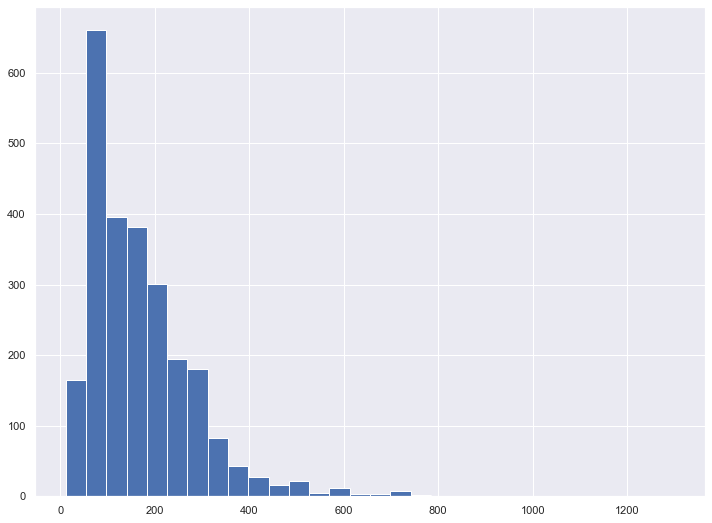

In [81]:
print("Orignal Prices from target data:")
print("Standard Deviation:")
listings_dataframe["price"].hist(bins = 30)
listings_dataframe["price"].std()

# Linear Regression

In [82]:
# from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [83]:
# Defining Independent variables and Dependent Variables
X = final_dataframe

Y = listings_dataframe["price"]

In [84]:
# Splitting the data into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)

In [85]:
# Fitting the model using training data set
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
# Predicting prices for test data set
lin_predictions = linear_regression_model.predict(X_test)

In [87]:
# Checking the accuracy of the prediction using RootMeanSquare and R2 method
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, lin_predictions)))
test_set_r2 = r2_score(Y_test, lin_predictions)

In [88]:
# Printing out the accuracy metrics
print("Accuracy Metric using Root Mean Square Method", + test_set_rmse)
print("Accuracy Metric using R2 score Method", + test_set_r2)

Accuracy Metric using Root Mean Square Method 59.93836002597206
Accuracy Metric using R2 score Method 0.6679180419928565


For Root mean square method the lower the value is, the better is the fit

Visualising predicted prices of Linear Regression
Standard Deviation:


95.8207784602507

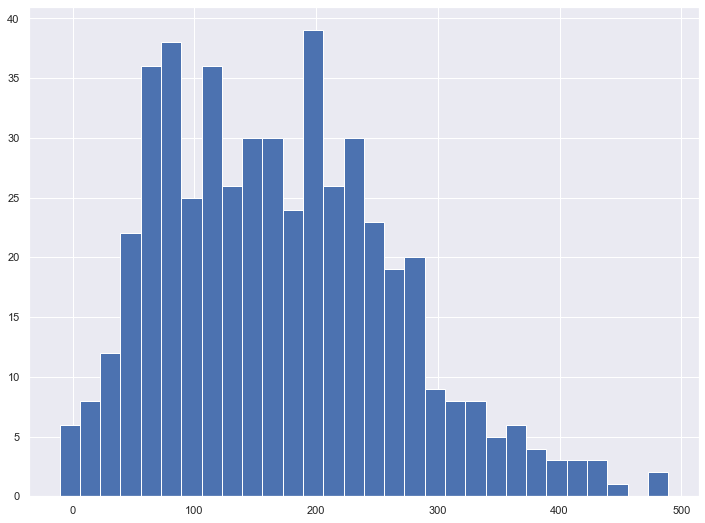

In [89]:
print("Visualising predicted prices of Linear Regression")
print("Standard Deviation:")
plt.hist(lin_predictions, bins = 30)
lin_predictions.std()

# Random Forest Regression

In [90]:
# We import necessary packages for performing random forest regression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [91]:
# Here we define a function for performing random forest regression


# Perform Grid-Search
gsc = GridSearchCV(
estimator=RandomForestRegressor(),
# Here the max depth is a parameter in the RFR which decides how many nodes deep should the model go
# The n-estimators defines the number of trees in each bunch or forest
param_grid={
    'max_depth': range(3,7),
    'n_estimators': (10, 50, 100, 1000),
},
cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
grid_result = gsc.fit(X_train, Y_train)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)

c:\python\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [92]:
## Here we fit the random forest regressor to the data

rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=False,
                      verbose=False, warm_start=False)

In [93]:
## Here we see values predicted by cross validation the model

rfr_predictions = rfr.predict(X_test)

In [94]:
# Calculate the absolute errors
errors = abs(rfr_predictions - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors),2))

# Checking the accuracy of the prediction using RootMeanSquare and R2 method
test_set_rmse = (np.sqrt(mean_squared_error(Y_test, rfr_predictions)))

# Printing out the accuracy metrics
print("Accuracy Metric using Root Mean Square Method", + test_set_rmse)

Mean Absolute Error: 43.45
Accuracy Metric using Root Mean Square Method 73.36414903129503


In [95]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 69.02 %.


Visualising the predicted prices using Random Forest Regressor
Standard Deviation:


95.8207784602507

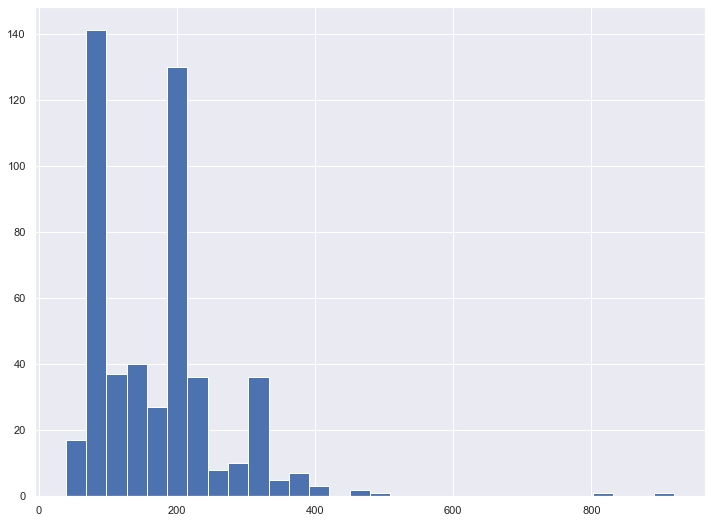

In [96]:
print("Visualising the predicted prices using Random Forest Regressor")
print("Standard Deviation:")
plt.hist(rfr_predictions, bins = 30)
lin_predictions.std()

In [97]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot

# # Pull out one tree from the forest
# tree = rfr.estimators_[5]
# feature_list = list(final_dataframe.columns)
# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

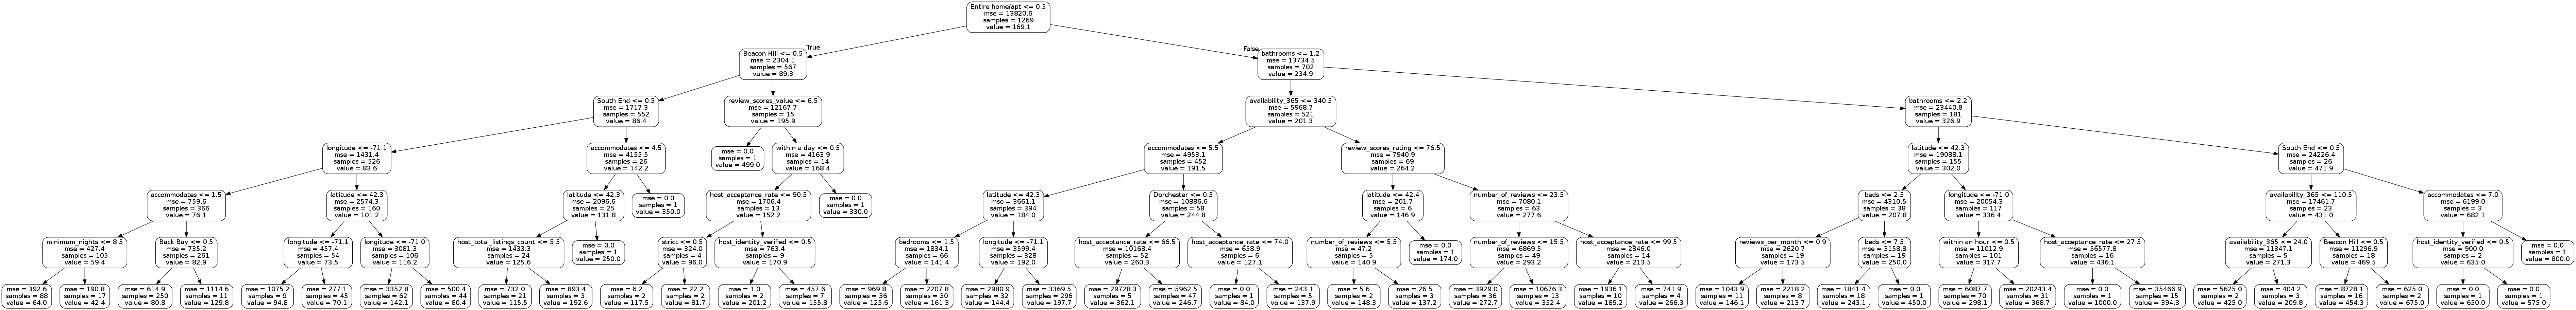

In [98]:
## We display the graph created 
from IPython.display import Image
Image(filename='tree.png') 

###### Comparison of Predictions

In [99]:
d = {'Linear Regression Prices': lin_predictions, 'Random Forest Regression Prices': rfr_predictions}
df=pd.DataFrame(data=d)
df.head()

,Linear Regression Prices,Random Forest Regression Prices
0,489.268626,470.428835
1,116.871432,80.359564
2,113.563258,184.267830
3,239.112929,280.202371
4,152.420768,182.115453


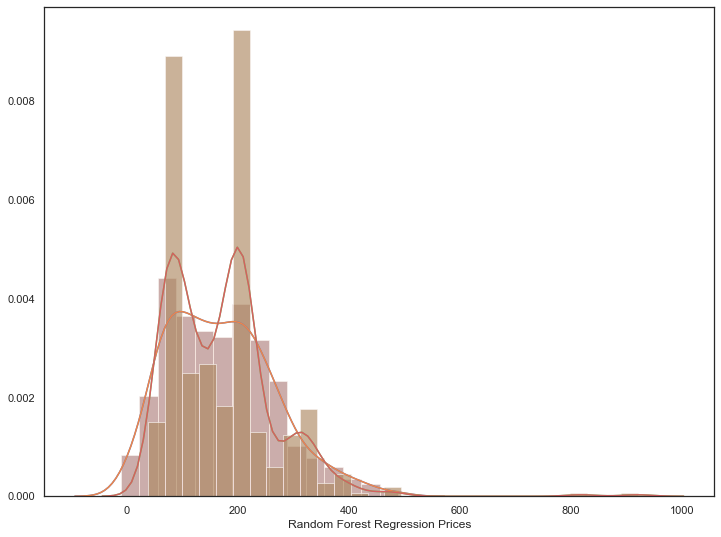

In [100]:
for col_id in df.columns:
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    sns.distplot(df[col_id])
    sns_hist = sns.distplot(df[col_id])

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
fig = sns_hist.get_figure()
fig.savefig('hist.png')

### Classification

In [101]:
classifcation_features = final_dataframe[['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'Townhouse', 'Villa', 'Entire home/apt', 'Private room', 'Shared room']]

In [102]:
final_dataframe['accommodates_cat'] = final_dataframe['accommodates'].astype('category')

In [103]:
classifcation_target = final_dataframe['accommodates']

In [104]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(classifcation_features, classifcation_target, test_size=0.2,random_state=42) # 80% training and 20% test

In [105]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [106]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report

# Model Accuracy, how often is the classifier correct?
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.15
Accuracy of GaussianNB classifier on test set: 0.12


In [107]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [108]:
print('Accuracy of Random forest classifier on training set: {:.2f}'
     .format(regressor.score(X_train, y_train)))
print('Accuracy of Random forest classifier on test set: {:.2f}'
     .format(regressor.score(X_test, y_test)))


Accuracy of Random forest classifier on training set: 0.96
Accuracy of Random forest classifier on test set: 0.77


In [109]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.622609561752988
Mean Squared Error: 0.7901245019920319
Root Mean Squared Error: 0.8888894768147679


# Clustering

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
def average_accomodates_finder(cluster_names, algorithm_array):
    avg_no_of_people = []
    count_of_listings = []
    
    for cluster_name in cluster_names:
        listing_indices = []
        counter = 0
        for assigned_value in algorithm_array:
            if assigned_value == cluster_name:
                listing_indices.append(counter)
            counter = counter + 1
            
        _sum = 0
        for listing_index in listing_indices:
            #print(final_dataframe.iloc[a,7])
            _sum = _sum + final_dataframe.iloc[listing_index,7]
        
        length_of_listing_indices = len(listing_indices)
        average_in_this_cluster = _sum/length_of_listing_indices
        #print("Average number of people in cluster", cluster_name, "=", average_in_this_cluster, "and count of listings in this cluster is =", length_of_listing_indices)
        
        avg_no_of_people.append(average_in_this_cluster)
        count_of_listings.append(length_of_listing_indices)
    
    return avg_no_of_people, count_of_listings

## Hierarchical Clustering

In [112]:
## generating dataframe by selecting features based on which listings will be clustered
dataframe_for_hierarchical_clustering = final_dataframe[['bathrooms','bedrooms','beds','guests_included','Apartment','Bed & Breakfast','Boat','Condominium','Dorm','Entire Floor','Guesthouse','House','Loft','Townhouse','Villa','Entire home/apt','Private room','Shared room','Airbed','Couch','Futon','Pull-out Sofa','Real Bed']]
dataframe_for_hierarchical_clustering.head()

,bathrooms,bedrooms,beds,guests_included,Apartment,Bed & Breakfast,Boat,Condominium,Dorm,Entire Floor,...,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
1,1.0,1.0,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,1.0,1.0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.0,1.0,2.0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.5,1.0,2.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1.0,1.0,1.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


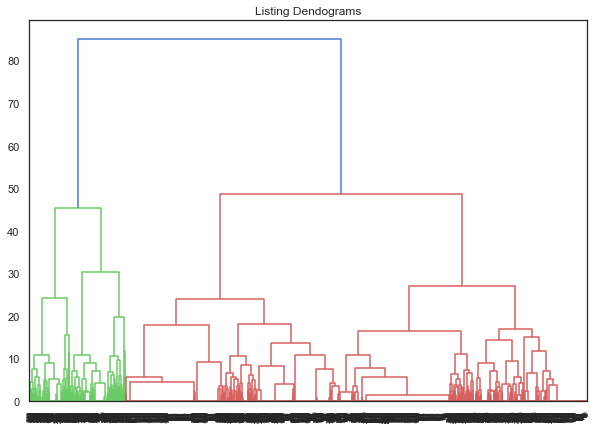

In [113]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Listing Dendograms")
dend = shc.dendrogram(shc.linkage(dataframe_for_hierarchical_clustering, method='ward'))

## k-means clustering

In [114]:
# generating dataframe by selecting features based on which listings will be clustered
dataframe_for_k_means_clustering = final_dataframe[['bathrooms','bedrooms','beds','guests_included','Apartment','Bed & Breakfast','Boat','Condominium','Dorm','Entire Floor','Guesthouse','House','Loft','Townhouse','Villa','Entire home/apt','Private room','Shared room','Airbed','Couch','Futon','Pull-out Sofa','Real Bed']]
dataframe_for_k_means_clustering.head()

,bathrooms,bedrooms,beds,guests_included,Apartment,Bed & Breakfast,Boat,Condominium,Dorm,Entire Floor,...,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
1,1.0,1.0,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,1.0,1.0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.0,1.0,2.0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.5,1.0,2.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1.0,1.0,1.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


#### k-means estimator

In [115]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(dataframe_for_k_means_clustering)
y_kmeans = kmeans.predict(dataframe_for_k_means_clustering)
y_kmeans

array([4, 4, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 5, 3, 1, 4,
       1, 4, 1, 1, 2, 1, 1, 0, 3, 3, 1, 1, 4, 4, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 2, 4, 1, 1, 4, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 0, 0, 0, 3, 1, 0, 5, 4, 4, 0, 2, 4, 1,
       0, 3, 0, 3, 2, 0, 0, 1, 2, 4, 4, 1, 2, 4, 0, 2, 4, 3, 5, 2, 0, 4,
       4, 4, 4, 0, 1, 4, 1, 0, 1, 1, 0, 4, 3, 5, 2, 4, 1, 4, 0, 0, 4, 4,
       5, 2, 0, 4, 0, 4, 4, 0, 0, 4, 4, 2, 0, 1, 3, 5, 2, 2, 3, 4, 1, 4,
       5, 0, 3, 4, 4, 1, 2, 4, 0, 1, 0, 0, 4, 4, 4, 4, 0, 1, 1, 2, 0, 0,
       5, 3, 4, 0, 4, 1, 0, 0, 4, 1, 2, 4, 4, 1, 0, 4, 0, 1, 1, 0, 4, 1,
       0, 1, 0, 4, 4, 5, 1, 0, 4, 3, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 4, 4,
       1, 4, 4, 1, 4, 1, 2, 0, 0, 1, 2, 4, 5, 3, 3, 0, 4, 4, 0, 1, 1, 4,
       4, 2, 4, 0, 1, 0, 3, 1, 1, 1, 0, 4, 0, 4, 4, 3, 3, 4, 1, 1, 4, 5,
       3, 0, 5, 3, 2, 1, 1, 0, 0, 1, 3, 2, 5, 0, 0, 5, 1, 1, 1, 4, 3, 1,
       0, 2, 1, 1, 1, 0, 4, 4, 2, 0, 2, 1, 1, 4, 4,

In [116]:
# Finding average number of people a listing in each cluster can accommodate
cluster_names = [0,1,2,3,4,5]
avg_no_of_people_kmeans, count_of_listings_kmeans = average_accomodates_finder(cluster_names, y_kmeans) 

In [117]:
a = list(zip(avg_no_of_people_kmeans, count_of_listings_kmeans))
d = {'Average Number of people': avg_no_of_people_kmeans, 'Count of Listings per cluster': count_of_listings_kmeans}
df = pd.DataFrame(data = d)
df

,Average Number of people,Count of Listings per cluster
0,3.233684,950
1,2.027254,477
2,5.009524,210
3,6.021277,188
4,1.817152,618
5,8.428571,63


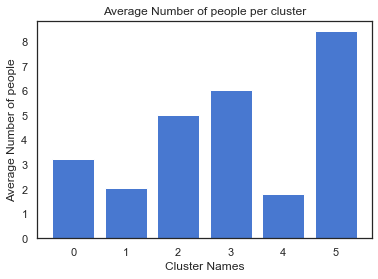

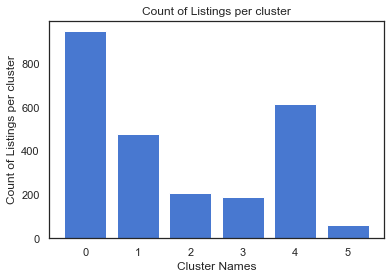

In [118]:
plt.bar(cluster_names, avg_no_of_people_kmeans)
plt.xlabel('Cluster Names')
plt.ylabel('Average Number of people')
plt.title('Average Number of people per cluster')
plt.show()
plt.bar(cluster_names, count_of_listings_kmeans)
plt.xlabel('Cluster Names')
plt.ylabel('Count of Listings per cluster')
plt.title('Count of Listings per cluster')
plt.show()

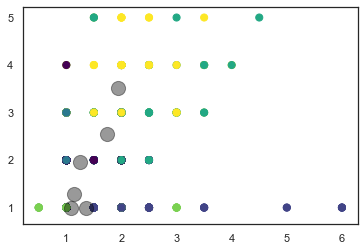

In [119]:
# plot
plt.scatter(dataframe_for_k_means_clustering.iloc[:, 0], dataframe_for_k_means_clustering.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.4);

## k-means clustering : Expectation - Maximization

In [120]:

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X.iloc[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X.iloc[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

[[1.37037037e+00 1.00000000e+00 1.17429194e+00 1.05664488e+00
  0.00000000e+00 4.35729847e-02 2.17864924e-03 9.80392157e-02
  2.17864924e-03 2.17864924e-03 0.00000000e+00 7.58169935e-01
  1.08932462e-02 6.31808279e-02 2.17864924e-03 1.74291939e-02
  9.69498911e-01 1.30718954e-02 6.53594771e-03 4.35729847e-03
  2.83224401e-02 6.53594771e-03 9.54248366e-01]
 [1.12264151e+00 1.00000000e+00 1.23584906e+00 2.07547170e+00
  7.83018868e-01 5.66037736e-02 0.00000000e+00 1.13207547e-01
  9.43396226e-03 0.00000000e+00 0.00000000e+00 9.43396226e-03
  9.43396226e-03 1.88679245e-02 0.00000000e+00 0.00000000e+00
  9.90566038e-01 9.43396226e-03 1.88679245e-02 0.00000000e+00
  2.83018868e-02 0.00000000e+00 9.52830189e-01]
 [1.45238095e+00 2.46753247e+00 3.41558442e+00 4.45021645e+00
  7.14285714e-01 0.00000000e+00 0.00000000e+00 7.79220779e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.81818182e-01
  1.29870130e-02 1.29870130e-02 0.00000000e+00 9.87012987e-01
  1.29870130e-02 0.00000000e+00 0.00

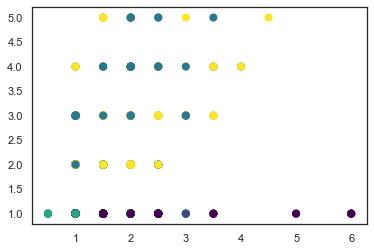

In [121]:
# plot
centers, labels = find_clusters(dataframe_for_k_means_clustering, 6)
print(centers, labels)
plt.scatter(dataframe_for_k_means_clustering.iloc[:, 0], dataframe_for_k_means_clustering.iloc[:, 1], c=labels, s=50, cmap='viridis');

In [122]:
# Finding average number of people a listing in each cluster can accommodate
cluster_names = [0,1,2,3,4,5]
avg_no_of_people_em, count_of_listings_em = average_accomodates_finder(cluster_names, labels)  

In [123]:
a = list(zip(avg_no_of_people_em, count_of_listings_em))
d = {'Average Number of people': avg_no_of_people_em, 'Count of Listings per cluster': count_of_listings_em}
df = pd.DataFrame(data = d)
df

,Average Number of people,Count of Listings per cluster
0,2.021786,459
1,2.349057,106
2,6.160173,231
3,2.032044,905
4,3.411168,394
5,5.094891,411


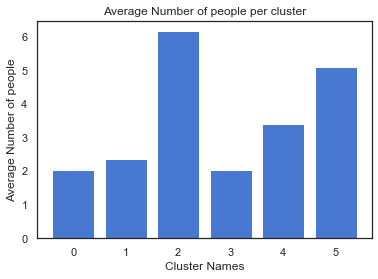

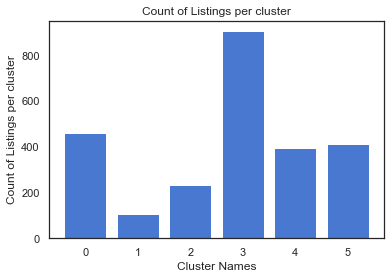

In [124]:
plt.bar(cluster_names, avg_no_of_people_em)
plt.xlabel('Cluster Names')
plt.ylabel('Average Number of people')
plt.title('Average Number of people per cluster')
plt.show()
plt.bar(cluster_names, count_of_listings_em)
plt.xlabel('Cluster Names')
plt.ylabel('Count of Listings per cluster')
plt.title('Count of Listings per cluster')
plt.show()

# Agglomerative Clustering

In [125]:
from sklearn.cluster import AgglomerativeClustering
import sys

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') # need to change the number of clusters
#cluster.fit_predict(dataframe_for_hierarchical_clustering)
agglomerative_array = np.array(cluster.fit_predict(dataframe_for_hierarchical_clustering))
np.set_printoptions(threshold=sys.maxsize)
print(agglomerative_array)

[5 5 3 3 3 2 3 3 4 3 3 2 4 4 3 3 3 5 1 0 3 5 3 3 3 3 4 3 3 2 0 0 3 3 3 5 3
 4 3 3 3 3 3 3 2 1 5 3 3 5 3 5 3 5 5 3 3 5 3 5 5 3 5 5 3 5 3 3 5 5 3 3 3 3
 3 2 2 2 0 3 5 1 5 5 2 4 5 3 2 0 2 0 4 2 2 5 4 5 5 3 1 5 2 4 5 0 1 4 2 5 5
 5 5 2 3 3 3 2 3 3 2 5 0 1 1 5 3 5 2 2 5 5 1 4 2 5 2 5 5 2 2 5 5 4 2 3 0 1
 4 4 0 5 3 5 1 2 0 5 5 3 4 5 2 3 2 2 5 5 5 3 2 3 3 4 2 2 1 0 5 2 5 3 2 2 5
 3 2 5 5 3 2 5 2 3 3 2 5 3 2 3 2 5 5 1 3 2 5 0 2 2 2 3 3 2 2 3 4 3 5 5 3 5
 5 3 5 3 4 2 2 3 4 5 1 0 0 2 3 5 2 3 3 5 5 1 5 2 3 2 0 3 5 3 3 5 2 3 5 4 0
 5 3 3 5 1 0 2 1 0 1 3 3 2 2 3 0 4 1 4 2 1 3 3 3 5 0 3 5 4 3 3 3 2 5 3 1 2
 4 3 3 5 5 3 5 0 2 0 5 3 5 3 3 2 5 2 5 3 0 5 3 5 5 3 5 5 5 3 0 3 2 2 2 4 4
 2 5 5 5 1 5 3 5 5 3 3 2 3 2 5 3 3 3 3 5 3 4 5 5 5 5 2 4 2 5 2 2 3 2 2 5 5
 5 5 3 5 5 2 2 0 5 2 5 3 5 3 5 5 5 2 3 2 2 3 0 3 3 2 3 5 5 5 3 3 2 5 2 0 5
 2 0 5 2 3 5 2 2 2 2 2 2 0 2 4 2 3 5 5 2 1 3 4 5 2 2 2 4 2 2 2 4 0 0 0 4 2
 2 5 5 2 5 0 2 2 2 5 2 2 2 2 2 5 2 5 0 2 2 4 2 5 2 2 0 2 5 5 2 2 5 4 2 2 2
 2 2 4 2 2 4 2 2 2 3 2 3 

In [126]:
# Finding average number of people a listing in each cluster can accommodate
cluster_names = [0,1,2,3,4,5]
avg_no_of_people_agglomerative, count_of_listings_agglomerative = average_accomodates_finder(cluster_names, agglomerative_array)                 
# print(avg_no_of_people_agglomerative)
# print(count_of_listings_agglomerative)            

In [127]:
a = list(zip(avg_no_of_people_agglomerative, count_of_listings_agglomerative))
d = {'Average Number of people': avg_no_of_people_agglomerative, 'Count of Listings per cluster': count_of_listings_agglomerative}
df = pd.DataFrame(data = d)
df

,Average Number of people,Count of Listings per cluster
0,6.298913,184
1,7.402439,82
2,3.260146,961
3,2.148000,500
4,5.035928,167
5,1.736928,612


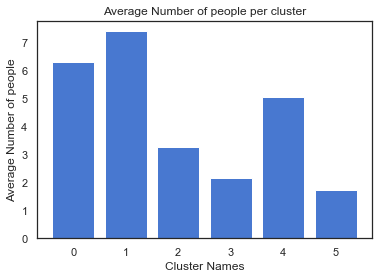

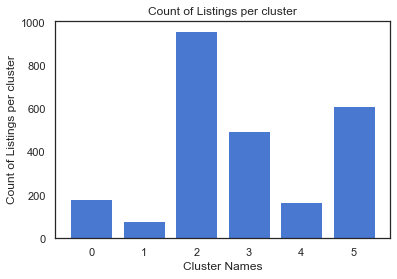

In [128]:
plt.bar(cluster_names, avg_no_of_people_agglomerative)
plt.xlabel('Cluster Names')
plt.ylabel('Average Number of people')
plt.title('Average Number of people per cluster')
plt.show()
plt.bar(cluster_names, count_of_listings_agglomerative)
plt.xlabel('Cluster Names')
plt.ylabel('Count of Listings per cluster')
plt.title('Count of Listings per cluster')
plt.show()

# Sentiment Analysis Of Reviews & its relationship with Price

In [129]:
reviewsDF = pd.read_csv("reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [130]:
#assigning polarity score to each comment and adding the same to dataframe
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value']="Default"
reviewsDF['neg']=0.0
reviewsDF['pos']=0.0
reviewsDF['neu']=0.0
reviewsDF['compound']=0.0
for index,row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.set_value(index,'polarity_value',ss)
    reviewsDF.set_value(index,'neg',ss['neg'])
    reviewsDF.set_value(index,'pos',ss['pos'])
    reviewsDF.set_value(index,'neu',ss['neu'])
    reviewsDF.set_value(index,'compound',ss['compound'])
reviewsDF.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
c:\python\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
c:\python\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
c:\python\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
c:\python\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\python\lib\site-packages\ipykernel_launch

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.0,0.352,0.648,0.9626
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...",0.0,0.361,0.639,0.9061
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.0,0.233,0.767,0.9663
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.0,0.327,0.673,0.9267
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.0,0.363,0.637,0.8658


In [131]:
reviewsDF.to_csv('pority_Values_reviews.csv')

In [132]:
# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.set_value(index,'language',lang)
    
#taking rows whose language is English
EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head(2)

c:\python\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.0,0.352,0.648,0.9626,en
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...",0.0,0.361,0.639,0.9061,en


In [133]:
# visualize polarity score for positivity

polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()

c:\python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
c:\python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,2161,0.0,positive
1,11933,0.1,positive
2,20777,0.2,positive
3,15746,0.3,positive
4,7409,0.4,positive


In [134]:
# visualize polarity score for negativity

polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

c:\python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
c:\python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,18093,0.0,negative
1,1452,0.1,negative
2,142,0.2,negative
3,22,0.3,negative
4,13,0.4,negative


In [135]:
# visualize polarity score for neutrality

polarDFnut=EngReviewsDF[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutrl')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

c:\python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
c:\python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,9,0.0,neutrl
1,206,0.1,neutrl
2,578,0.2,neutrl
3,1316,0.3,neutrl
4,3244,0.4,neutrl


c:\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

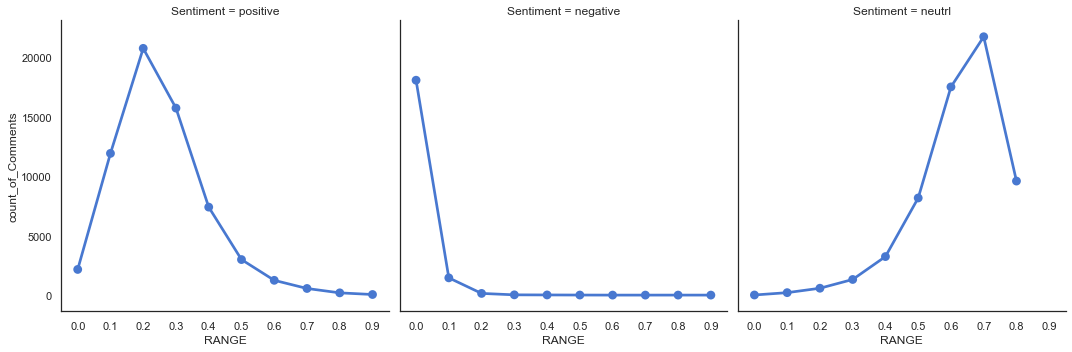

In [136]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment")

It can be seen that Almost none of the texts are classified as having significant amounts of negativity. In fact, a significant amount of them are given exactly 0.0 negativity.It can be clearly seen that most of the comments are neutral.However, a signifigant amount of comments are positive.

We can loosely interpret number of reviews as times people have stayed in the said listing. Of course, this depends on when the listing appeared, how long it appeared for, and various other factors. But it could serve to be useful information to see correlation between price and number of reviews.Lets check if there is any relationship between number of reviews and price of listing.

Text(0, 0.5, 'Number of reviews')

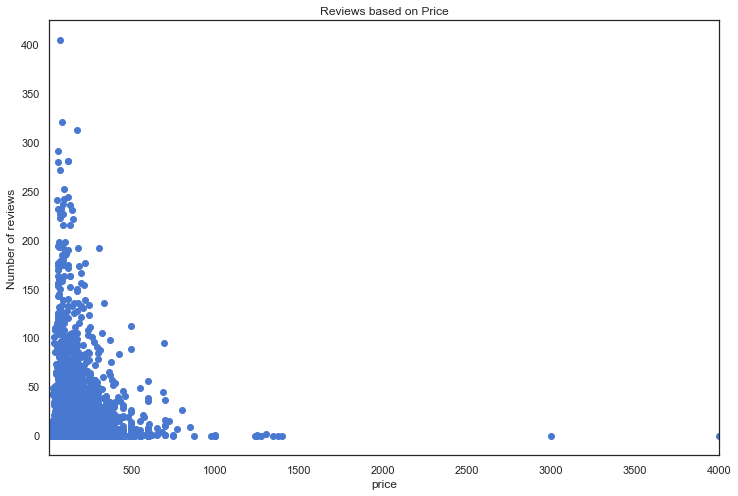

In [137]:
inputDF = pd.read_csv('listings.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")


The graph shows that listings with prices that range around 100 - 400 get the most reviews, probably because they are in the most reasonable price range. The number quickly declines as the price goes up. This indicates that more people book listings that are around $100 - 400 in prices. This shows that it is not necessary for an expensive listing to have large number of reviews.Heneforth there is no exact relation between Prices and Number of Reviews for a listing.

Lets analyze what were the most talked about words in all the comments

In [138]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in EngReviewsDF.iterrows():
    words += row['comments']

In [139]:
nltk.download('punkt')
reviews_data=nltk.word_tokenize(words)
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s",'!',',',]
nums=['0','1','2','3','4','5','6','7','8','9']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [140]:
from nltk.corpus import stopwords
nltk.download('stopwords')
cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')

words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
words_only = [s for s in words_only if s]
comments_filtered_data=' '.join(words_only)
comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


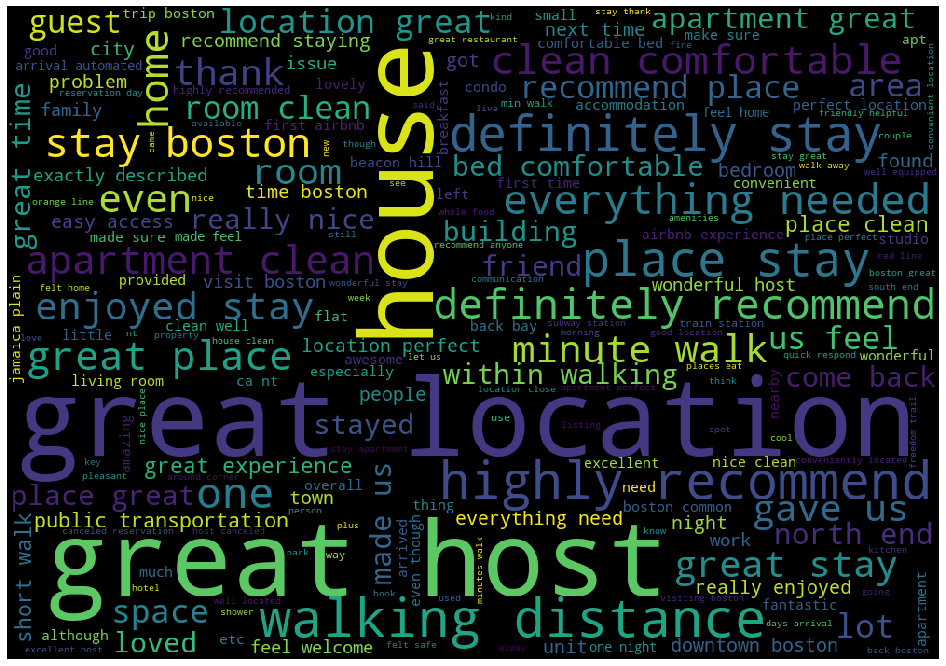

In [141]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


It can be seen that the most talked about words are "great location", "great host", "walking distance" and "highly recommended".All these reviews and comments plays a big role in attracting the attention of travellers and if there are comments such as "highly recommended" then travellers surely takes a look at the listing."